# Bibliotecas

In [ ]:
pip install pandas requests selenium

In [55]:
import pandas as pd
import requests

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# Identificar a tabela

In [56]:
driver = webdriver.Edge()
driver.get('https://www2.bmf.com.br/pages/portal/bmfbovespa/lumis/lum-boletim-online-ptBR.asp?Acao=BUSCA&cboMercadoria=DI1')
tabela = driver.find_element(By.XPATH, '//*[@id="principal"]').get_attribute('outerHTML')
driver.quit()

In [57]:
pd.read_html(tabela, decimal=',', thousands='.')[0]
tabela_completa = pd.read_html(tabela, decimal=',', thousands='.')[1]

# Obtenção e Manipulação de Dados

In [58]:
for i in range(2,4):
    tabela_completa = pd.concat([tabela_completa, pd.read_html(tabela, decimal=',', thousands='.')[i]], axis=1)

faltantes = tabela_completa.isnull().sum()*100/len(tabela_completa)

tabela_completa.drop(list(faltantes[faltantes==100].index),axis=1,inplace=True) #Removendo dados faltantes
tabela_completa

,Mercado,Vecto.,Contr. Aberto,Núm. Negoc.,Contr. Negoc.,Volume,Preço Abertura,Preço Mínimo,Preço Máximo,Preço Médio,Último Preço,Últ.Of. Compra,Últ.Of. Venda,Ajuste Anterior
0,FUT,01/07/2024,4767966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.40
1,FUT,01/08/2024,1124423.0,2599.0,559541.0,5.544977e+10,10.42,10.42,10.44,10.43,10.44,10.43,10.44,10.43
2,FUT,02/09/2024,284827.0,356.0,143130.0,1.406051e+10,10.45,10.45,10.49,10.48,10.49,10.48,10.49,10.48
3,FUT,01/10/2024,3604686.0,7967.0,554685.0,5.403279e+10,10.51,10.50,10.56,10.53,10.53,10.53,10.53,10.54
4,FUT,01/11/2024,172213.0,89.0,2309.0,2.228274e+08,10.58,10.58,10.63,10.60,10.63,10.60,10.62,10.61
5,FUT,02/12/2024,245287.0,105.0,13957.0,1.336160e+09,10.69,10.66,10.74,10.71,10.71,10.70,10.73,10.71
6,FUT,02/01/2025,5909438.0,49430.0,1770601.0,1.679980e+11,10.74,10.74,10.87,10.80,10.84,10.83,10.84,10.84
7,FUT,03/02/2025,82894.0,115.0,1402.0,1.317718e+08,10.88,10.86,10.96,10.90,10.96,10.95,10.97,10.96
8,FUT,05/03/2025,148518.0,197.0,1689.0,1.573362e+08,10.97,10.96,11.09,11.02,11.09,11.07,11.09,11.08
9,FUT,01/04/2025,1646207.0,16475.0,281407.0,2.599430e+10,11.00,10.99,11.18,11.10,11.16,11.15,11.16,11.16


In [59]:
tabela_completa.index = tabela_completa['Vecto.']

# Gráfico

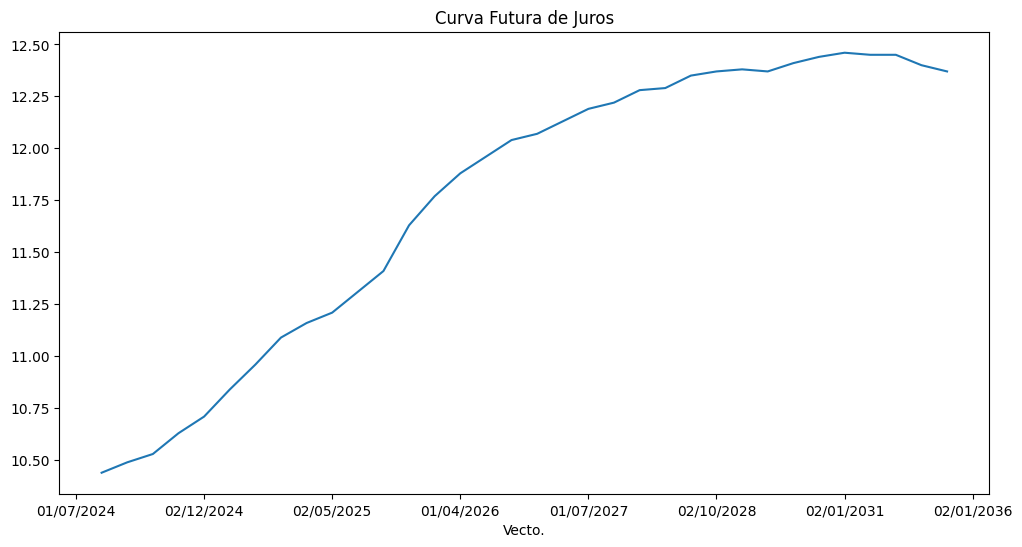

In [60]:
tabela_completa.iloc[:-1]['Último Preço'].plot(figsize = (12,6),title='Curva Futura de Juros');